In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

In [61]:
baseball = pd.read_csv('./data/baseball.csv')
moneyball = baseball.loc[baseball.Year < 2002]
# To avoid some copy warning
moneyball.is_copy = False

In [62]:
# Runs difference = Runs score - runs allowed (to make this a little easier)
moneyball.loc[:,'RD'] = moneyball.RS - moneyball.RA

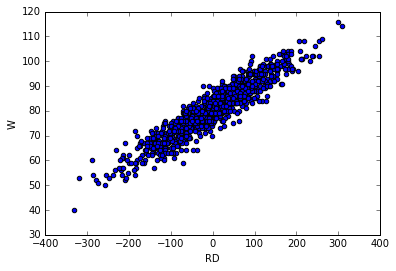

In [42]:
moneyball.plot('RD', 'W', kind='scatter')

In [43]:
# We can see a strong linear relation between these two variables

In [46]:
# Using sklearn
wins_reg = LinearRegression()
wins_reg.fit(moneyball[['RD']], moneyball.W)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
# Using statsmodels
wins_reg_ols = sm.ols(formula='W ~ RD', data=moneyball)
fitted = wins_reg_ols.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Wed, 29 Jun 2016   Prob (F-statistic):               0.00
Time:                        19:00:29   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     80.8814      0.131    616.675      0.000        80.624    81.139
RD             0.1058      0.001     81.554      0.000         0.103     0.108
==============================================================================
Omnibus:                        5.788   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.736
Skew:                          -0.195   Prob(JB):                       0.0568
Kurtosis:                       3.033   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# So we have: W = 80.8814 + 0.1058 * RD
# And we want W >= 95 (it's the threshold for the playoffs)
# 80.8814 + 0.1058 * RD >= 95
# RD >= 133.4

## Predicting Runs

How does a team score more runs?

On-Base Percentage (OBP)
* percentage of time a player gets on base, including walks.

Slugging Percentage (SLG)
* how far a player gets around the bases on his turn, and measures the power of a hitter.

Most teams focused on Batting Average (BA)

But the A's claimed that OBP was the most important, followed by SLG and BA was overvalued.

Let's see if we can predict Run Scores using these three hitting stats building a linear regression.

In [54]:
runs_reg = sm.ols(formula='RS ~ OBP + SLG + BA', data=moneyball)
fitting_runs = runs_reg.fit()
fitting_runs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3989.
Date:                Wed, 29 Jun 2016   Prob (F-statistic):               0.00
Time:                        19:26:32   Log-Likelihood:                -4170.2
No. Observations:                 902   AIC:                             8348.
Df Residuals:                     898   BIC:                             8368.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -788.4570     19.697    -40.029      0.000      -827.115  -749.799
OBP         2917.4214    110.466     26.410      0.000      2700.619  3134.224
SLG         1637.9277     45.994     35.612      0.000      1547.659  1728.197
BA          -368.9661    130.580     -2.826      0.005      -625.244  -112.688
==============================================================================
Omnibus:                        3.441   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                3.381
Skew:                           0.150   Prob(JB):                        0.184
Kurtosis:                       3.018   Cond. No.                         214.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that all features are significant and our R2 is 0.93. But if we look at our weights, we can see that BA is negative. Impling that a team with lower batting average will score more runs, a bit couterintuitive.

What's going on is a case of multicollinearity because these three features are highly correlated.

Let's remove BA

In [55]:
runs_reg = sm.ols(formula='RS ~ OBP + SLG', data=moneyball)
fitting_runs = runs_reg.fit()
fitting_runs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     5934.
Date:                Wed, 29 Jun 2016   Prob (F-statistic):               0.00
Time:                        19:31:12   Log-Likelihood:                -4174.2
No. Observations:                 902   AIC:                             8354.
Df Residuals:                     899   BIC:                             8369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -804.6271     18.921    -42.526      0.000      -841.761  -767.493
OBP         2737.7680     90.685     30.190      0.000      2559.790  2915.746
SLG         1584.9086     42.156     37.597      0.000      1502.174  1667.643
==============================================================================
Omnibus:                        3.099   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                3.106
Skew:                           0.143   Prob(JB):                        0.212
Kurtosis:                       2.972   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that our model is almost the same and simplier.